# Name: Lam Han Vuong - 14521106

## Cluster Hand-Written-Digit from sklearn.datasets import load_digits


# Import Package


In [2]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from random import randint
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from operator import itemgetter
from sklearn.datasets import fetch_lfw_people
from skimage.feature import local_binary_pattern


## Read Data 



In [3]:
digits = fetch_lfw_people(data_home=None, funneled=True, resize=1, min_faces_per_person=0, color=False, slice_=(slice(70, 195, None), slice(78, 172, None)), download_if_missing=True)
image, labels = digits.data, digits.target
# Chọn những face có hơn 30 label để tiến hành phần loại


In [5]:
labels.shape

(13233,)

In [47]:
counts = collections.Counter(labels).most_common(2)
print(counts)
lst = []
for i in range(0,len(counts)):
    value = np.where( digits.target ==  counts[i][0])
    lst.append(value)
print(lst)
for i in range(0,len(lst)):
    labels = np.delete(labels,lst[i],axis=0)
    image = np.delete(image, lst[i], axis=0)

[(3, 530), (1, 236)]
[(array([   3,    4,    7,    9,   14,   16,   19,   23,   33,   38,   39,
         42,   46,   47,   55,   56,   57,   61,   72,   73,   74,   78,
         81,   82,   84,   88,   90,   91,   92,  103,  106,  107,  108,
        111,  112,  114,  115,  121,  122,  123,  126,  128,  129,  130,
        132,  139,  140,  144,  146,  149,  150,  153,  160,  162,  168,
        175,  176,  177,  184,  188,  194,  195,  197,  198,  199,  202,
        203,  207,  208,  212,  217,  220,  221,  222,  223,  225,  228,
        230,  236,  243,  244,  245,  246,  248,  254,  258,  259,  260,
        263,  266,  268,  269,  270,  272,  281,  282,  283,  284,  285,
        286,  287,  288,  289,  290,  291,  298,  303,  307,  310,  312,
        315,  317,  319,  320,  323,  325,  327,  335,  340,  342,  344,
        345,  351,  353,  354,  356,  357,  360,  361,  381,  382,  396,
        400,  402,  404,  406,  409,  418,  422,  426,  444,  446,  447,
        448,  450,  451,  45

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  # Remove the CWD from sys.path while we load stuff.


In [49]:
import collections
counts = collections.Counter(labels)
counts

Counter({0: 63,
         1: 197,
         2: 108,
         4: 90,
         5: 62,
         6: 42,
         7: 41,
         8: 44,
         9: 50,
         10: 45,
         11: 124})

### Reshape image before using LBP to find feature

In [9]:
dataset=[]
for i in image:
    dataset.append(np.reshape(i,(-1,94)))

#### Show the first image

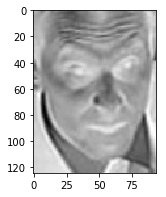

In [51]:
plt.figure(1, figsize=(3, 3))
plt.imshow(dataset[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Histogram of data

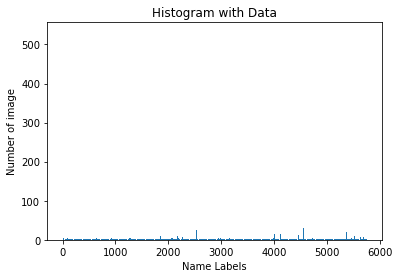

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
hist, bins = np.histogram(labels, bins=max(labels)+1)
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Histogram with Data")
plt.xlabel('Name Labels')
plt.ylabel('Number of image')
plt.show()

# get feature by local binary pattern

In [10]:
def getFeture(data,radius, n_points):
    featureOfDataset = []
    for i in data:
        temp = local_binary_pattern(i, n_points, radius, method = 'ror').flatten()
        featureOfDataset.append(temp)
    return featureOfDataset

In [11]:
featureOfDataset = getFeture(dataset,3,8*3)

## Reduce Dimentions  using PCA

In [12]:
pca = decomposition.PCA(n_components=2)
train_reduced = pca.fit_transform(image)
colors = []
for i in range(max(labels)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

#### Show on plt

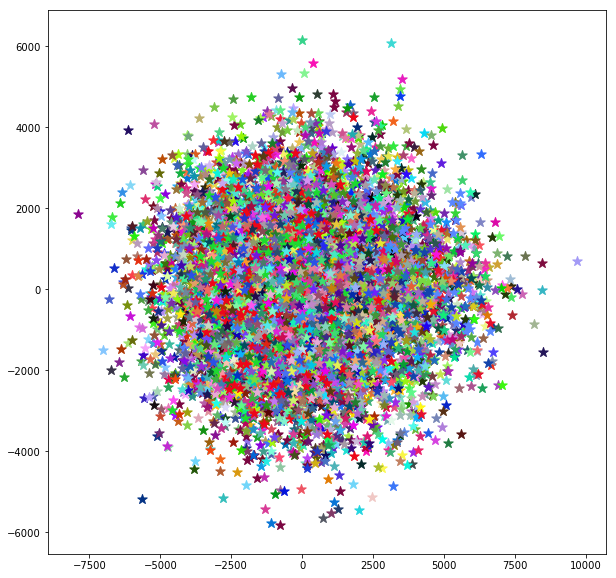

In [13]:
plt.show()
plt.figure(figsize=(10, 10))
for i in range(0,max(labels)): 
    plt.scatter(train_reduced[labels==i,0], train_reduced[labels ==i,1], s=100, c=colors[i], marker='*', label='cluster 1')

# Create method to cluster

In [14]:
km = KMeans(n_clusters=max(labels),init='random',n_init=100,max_iter=200,tol=1e-04,random_state=0)
sc = SpectralClustering(n_clusters=max(labels), eigen_solver='arpack', affinity="nearest_neighbors")
ac = AgglomerativeClustering(n_clusters=max(labels), affinity='euclidean')


## Clustering data

In [ ]:
y_km=km.fit_predict(image)
y_sc=sc.fit_predict(image)
y_ac = ac.fit_predict(image)

In [45]:
y_ac

array([14, 14, 15, ...,  1, 27,  1], dtype=int64)

In [45]:
ds = DBSCAN(eps=0.1, min_samples=8)
y_ds = ds.fit_predict(image)
max(y_ds)

-1

# Evaluate

### Show on plot result

In [13]:
centriod_km = km.cluster_centers_
centriod_km = pca.fit_transform(centriod_km)
centriod_km

array([[-18.34153665, -11.93682088],
       [  6.82606028,  -4.42720132],
       [ 21.61762927,  -2.59812166],
       [  1.38241973,  20.55890283],
       [ -0.2115527 ,  17.4743982 ],
       [  2.32220836,  -7.77778045],
       [  8.43795088,  -3.97330554],
       [ -2.91960553, -15.16631838],
       [-19.11357363,   7.8462472 ]])

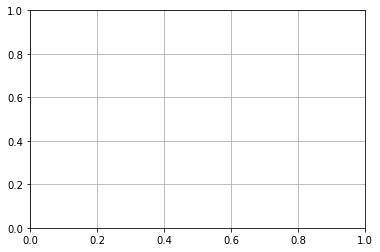

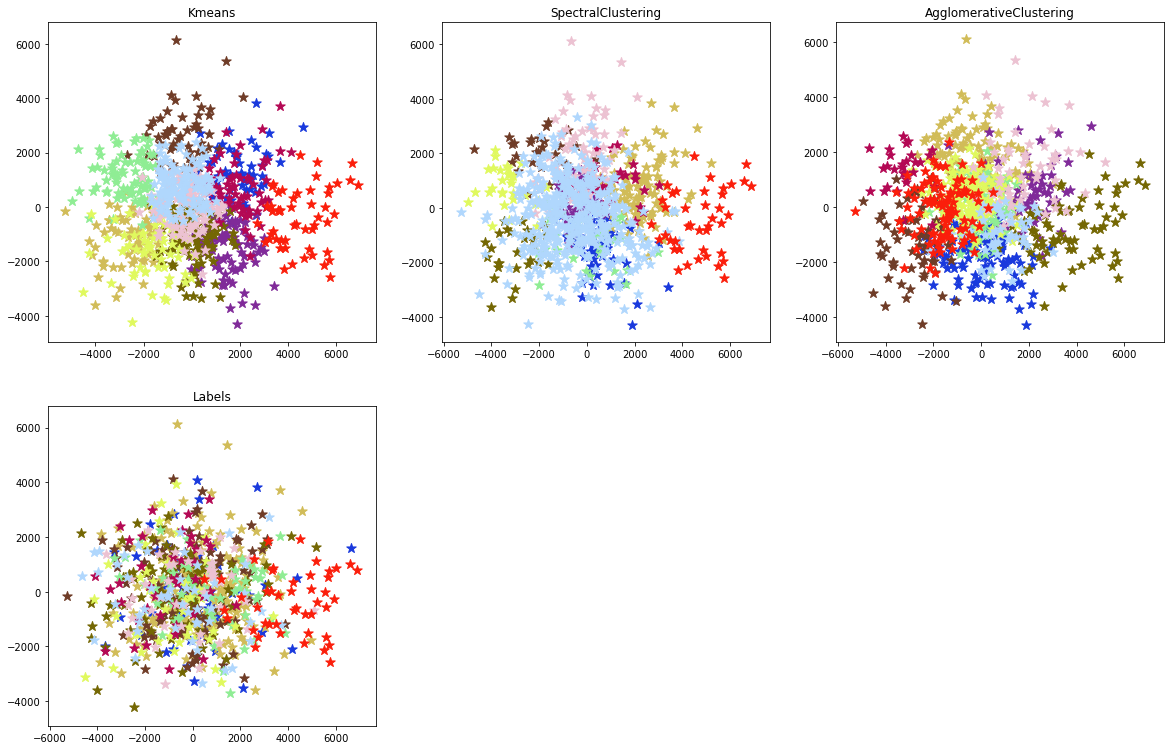

In [62]:
plt.grid()
plt.show()
plt.figure(figsize=(20,20))

for i in range(0,max(labels)): 
    plt.subplot(331)
    plt.title('Kmeans')
    plt.scatter(train_reduced[y_km==i,0], train_reduced[y_km ==i,1], s=100, c=colors[i], marker='*')
    plt.subplot(332)
    plt.title('SpectralClustering')
    plt.scatter(train_reduced[y_sc==i,0], train_reduced[y_sc ==i,1], s=100, c=colors[i], marker='*')
    plt.subplot(333)
    plt.title('AgglomerativeClustering')
    plt.scatter(train_reduced[y_ac==i,0], train_reduced[y_ac ==i,1], s=100, c=colors[i], marker='*')
    plt.subplot(334)
    plt.title('Labels')
    plt.scatter(train_reduced[labels==i,0], train_reduced[labels ==i,1], s=100, c=colors[i], marker='*')


In [67]:
from sklearn import metrics
print(metrics.adjusted_rand_score(y_km,labels))
print(metrics.adjusted_rand_score(y_sc,labels))
print(metrics.adjusted_rand_score(y_ac,labels))

0.0348664800175
0.0156905982723
0.0401052743903
